<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#setup" data-toc-modified-id="setup-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>setup</a></span></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#The-Dry-LES-dataset" data-toc-modified-id="The-Dry-LES-dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The Dry LES dataset</a></span><ul class="toc-item"><li><span><a href="#Intro-to-netcdf" data-toc-modified-id="Intro-to-netcdf-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Intro to netcdf</a></span></li></ul></li><li><span><a href="#Intro-to-python-packages" data-toc-modified-id="Intro-to-python-packages-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Intro to python packages</a></span></li><li><span><a href="#Setting-up-the-environment" data-toc-modified-id="Setting-up-the-environment-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Setting up the environment</a></span></li><li><span><a href="#Intro-to-jupytext" data-toc-modified-id="Intro-to-jupytext-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Intro to jupytext</a></span></li><li><span><a href="#Now-download-the-data" data-toc-modified-id="Now-download-the-data-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Now download the data</a></span></li><li><span><a href="#Dumping-the-netcdf-metadata" data-toc-modified-id="Dumping-the-netcdf-metadata-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Dumping the netcdf metadata</a></span></li><li><span><a href="#Plot-$\theta$-profile-for-every-third-timestep-(i.e.-every-30-minutes)" data-toc-modified-id="Plot-$\theta$-profile-for-every-third-timestep-(i.e.-every-30-minutes)-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Plot $\theta$ profile for every third timestep (i.e. every 30 minutes)</a></span></li><li><span><a href="#Color-contour-plot-of-one-level-for-realization-c1,-last-timestep" data-toc-modified-id="Color-contour-plot-of-one-level-for-realization-c1,-last-timestep-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Color contour plot of one level for realization c1, last timestep</a></span></li></ul></li><li><span><a href="#Assignment" data-toc-modified-id="Assignment-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Assignment</a></span><ul class="toc-item"><li><span><a href="#Option-1----return-perturbations-as-a-list" data-toc-modified-id="Option-1----return-perturbations-as-a-list-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Option 1 -- return perturbations as a list</a></span></li><li><span><a href="#Option-2----return-a-4-dimensional-array-with-ensembles-as-the-first-dimension" data-toc-modified-id="Option-2----return-a-4-dimensional-array-with-ensembles-as-the-first-dimension-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Option 2 -- return a 4 dimensional array with ensembles as the first dimension</a></span></li></ul></li></ul></div>

In [1]:
#import antigravity

# setup

Here's an alternative to using the a500/__init__.py file to define your paths. Import a context module that lives in the same directory as dry_les.ipynb and python/dry_les.ipynb (so you need two copies). Advantage: this file can be changed without having to reinstall the a500 module.

In [2]:
import context
print(f'here is the data folder: {context.data_dir}')

through /Users/phil/repos/a500_notebooks/notebooks/context.py
here is the data folder: /Users/phil/repos/a500_notebooks/data


In [3]:
import sys
import a500
from matplotlib import pyplot as plt
from netCDF4 import Dataset
import numpy as np

through /Users/phil/repos/a500_notebooks/a500/__init__.py


# Introduction

## The Dry LES dataset

This notebook looks at a portion of a dataset that was generated by running a large eddy simulation 10 different times with identical conditions.  The 10 realizations of temperature and pressure are stored as a single netcdf file

### Intro to netcdf

See the function descriptions and tutorial at http://unidata.github.io/netcdf4-python/

## Intro to python packages

Start with this general intro:  https://www.learnpython.org/en/Modules_and_Packages

This notebook is part of this git repo: https://github.com/phaustin/a500_notebooks

Clone this repo:

```
git clone https://github.com/phaustin/a500_notebooks
```

The `a500_notebooks` folder contains a python setup.py file:  https://github.com/phaustin/a500_notebooks/blob/master/setup.py
which can be used to install a series of helper routines:  

https://github.com/phaustin/a500_notebooks/tree/master/a500/utils

a. To install these using pip, first sync with my repo.
   
     cd a500_notebooks
     git fetch origin
     git reset --hard origin/master
 
 b. Next to an ["editable install"](https://stackoverflow.com/questions/42609943/what-is-the-use-case-for-pip-install-e), so that you can continue to change the module after installation:
    
    pip install -e .
    
   (this is called an editable install for reasons I'll explain in class)
   
   [1]: https://en.wikipedia.org/wiki/Pip_(package_manager)
 
b. Check the install by executing the cell below to download a data file.

   If it succeeds, you should see:
   
       download case_60_10.nc: size is    499.3 Mbytes

## Setting up the environment

You should be able to create an environment called "a500test" by changing into the conda folder and doing:

```
conda env create -f environment.yml
conda activate a500test
```

as explained in class


## Intro to jupytext

Note that the two notebooks in https://github.com/phaustin/a500_notebooks/tree/master/notebooks both have
python versions in https://github.com/phaustin/a500_notebooks/tree/master/notebooks/python

In class I'll explain how I use https://github.com/mwouts/jupytext  to pair every ipynb file with a py file that is easier to examine and maintain on github, and how jupyter notebooks can sync the pair of ipynb and py files using
[jupyter_notebook_config.py](https://github.com/phaustin/a500_notebooks/blob/master/conda/jupyter_notebook_config.py)


## Now download the data

In [4]:
from  a500.utils.data_read import download
the_root="http://clouds.eos.ubc.ca/~phil/docs/atsc500/data/"
the_file='case_60_10.nc'
out=download(the_file,root=the_root,dest_folder=a500.data_dir)

trying http://clouds.eos.ubc.ca/~phil/docs/atsc500/data//case_60_10.nc
writing to: /Users/phil/repos/a500_notebooks/data/case_60_10.nc

case_60_10.nc already exists
and is 499251027 bytes
will not overwrite



## Dumping the netcdf metadata

Netcdf file layout:  10 groups corresponding to 10 different ensemble members.  Small slice of larger domain of LES run with surface heat flux of 60 W/m^2 and stable layer with dT/dz = 10 K/km.  Snapshots every 10 minutes for 8 hours.

We can read the metdata using the following utils function:

In [5]:
from a500.utils.ncdump import ncdump

the_file = a500.data_dir / the_file
with Dataset(the_file) as nc_in:
    ncdump(nc_in)

NetCDF Global Attributes:
	heat_flux_W_m2: 100
	gamma_K_km: 10
NetCDF dimension information:
	Name: time
		size: 48
		type: dtype('float32')
		units: 'minutes'
	Name: x
		size: 25
		type: dtype('float32')
		units: 'meters'
	Name: y
		size: 20
		type: dtype('float32')
		units: 'meters'
	Name: z
		size: 130
		type: dtype('float32')
		units: 'meters'
NetCDF variable information for group root:
	Name: press
		dimensions: ('z',)
		size: 130
		type: dtype('float32')
		units: 'Pa'
NetCDF variable information for group c1:
	Name: TABS
		dimensions: ('time', 'z', 'y', 'x')
		size: 3120000
	Name: W
		dimensions: ('time', 'z', 'y', 'x')
		size: 3120000
	Name: U
		dimensions: ('time', 'z', 'y', 'x')
		size: 3120000
	Name: V
		dimensions: ('time', 'z', 'y', 'x')
		size: 3120000
NetCDF variable information for group c2:
	Name: TABS
		dimensions: ('time', 'z', 'y', 'x')
		size: 3120000
	Name: W
		dimensions: ('time', 'z', 'y', 'x')
		size: 3120000
	Name: U
		dimensions: ('time', 'z', 'y', 'x')
		size

## Plot $\theta$ profile for every third timestep (i.e. every 30 minutes)

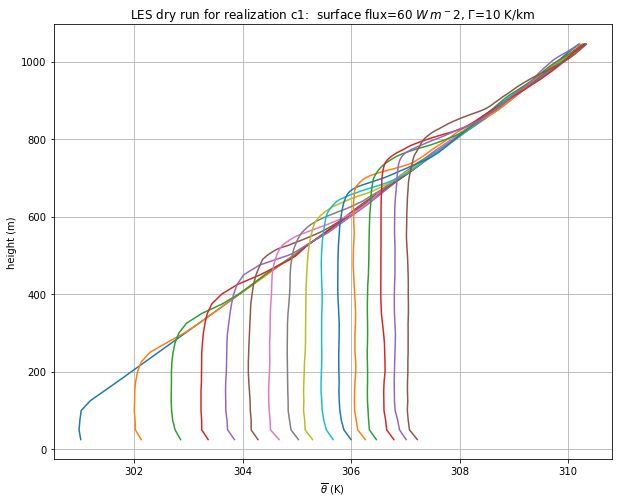

In [6]:
def make_theta(temp,press):
    """
      temp in K
      press in Pa
      returns theta in K
    """
    p0=1.e5
    Rd=287.  #J/kg/K
    cpd=1004.  #J/kg/K
    theta=temp*(p0/press)**(Rd/cpd)
    return theta

case_name='case_60_10.nc'
#
#  look at the first ensemble member
#
ensemble='c1'
with Dataset(case_name,'r') as ncin:
    #
    # grab the group variables
    #
    group = ncin.groups[ensemble]
    temp=group.variables['TABS'][...]
    press=ncin.variables['press'][...]
    z=ncin.variables['z'][...]
mean_temp=temp.mean(axis=(3,2))

fig,ax=plt.subplots(1,1,figsize=(10,8))
for i in np.arange(0,temp.shape[0],3):
    theta = make_theta(mean_temp[i,:],press)
    ax.plot(theta,z)
out=ax.set(xlabel=r'$\overline{\theta}$ (K)',ylabel='height (m)',
       title=f'LES dry run for realization {ensemble}:  surface flux=60 $W\,m^{-2}$, $\Gamma$=10 K/km')
ax.grid(True, which='both')

In [7]:
temp.shape

(48, 130, 20, 25)

## Color contour plot of one level for realization c1, last timestep

1. Find the index of the level closest to 400 meters using searchsorted
2. Retrieve the horizontal temperature field for this realization at the last timestep

In [8]:
index=np.searchsorted(z,400.)
temp_400=temp[-1,index,:,:]

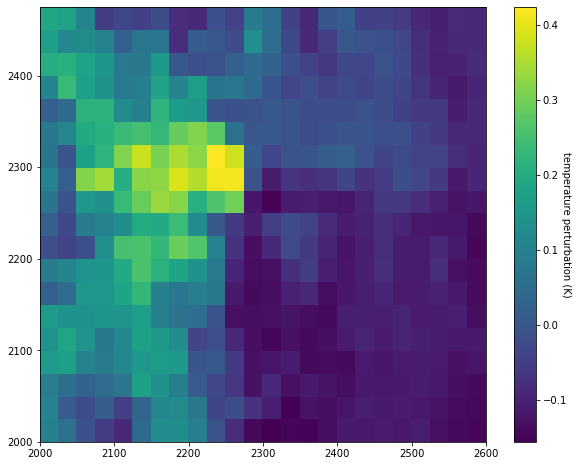

In [9]:
temp_diff=temp_400 - temp_400.mean(axis=(0,1))
fig,ax=plt.subplots(1,1,figsize=(10,8))
with Dataset(case_name,'r') as ncin:
    x=ncin.variables['x'][...]
    y=ncin.variables['y'][...]
cs=ax.pcolormesh(x,y,temp_diff)
cb=fig.colorbar(cs)
cb.set_label('temperature perturbation (K)',rotation=-90)

# Assignment

This routine from [tropical_boundary_layer.py](https://github.com/phaustin/a500_notebooks/blob/ddeaec7f1baaf6cd25a15ab3c2c436a677136c07/notebooks/python/tropical_boundary_layer.py#L74-L83) calculates the 2-d horizontal spatial mean and the perturbation for a 3-d field like temperature.

```
def do_reynolds(array3d):
    """
        do a spatial-mean reynolds average of a 3d field array3d
        needs dimensions arranged as (z,y,x)
        returns avg(z),perturb(z,y,x)
    """
    avg=array3d.mean(axis=2).mean(axis=1)
    perturb=array3d.T - avg
    perturb=perturb.T
    return avg,perturb
```

In the cell below, write a new version that calculates the ensemble mean and the 3-d perturbation for a 3D field like TABS in the dry-les dataset.

a.) Using your version of do_reynolds, make a pcolormesh plot for the ensemble-averaged vertical temperature flux
at the 400 meter level for this ensemble

b.) Plot the horizontally averaged vertical temperature-flux vs. height for each of the 10 ensemble members as 10 lines, to show the variablity in the between individual ensemble members.


In [10]:
def do_ensemble_average(nc_in, varname, timestep):
    """
        do an ensemble-mean of 3d field varname at timestep=timestep
        given a netcdf file with groups containing the ensemble members
        returns varname_average
        
        Variable dimension order needs to be (time,z,y,x)
        
        Parameters
        ----------
        
        ncfile:  netcdf4 Dataset
        varname: string
             variable name to average over
        timestep: int
             timestep to select
             
        Returns
        -------
        
        avg_var:  float
            ensemble average of the variable

    """
    #
    # also fine to list the group names by hand
    #  like ['c0','c1','c2',...]
    #
    group_names=list(nc_in.groups.keys())
    group0=nc_in.groups[group_names[0]]
    var0=group0.variables[varname][timestep,...]
    for a_name in group_names[1:]:
        the_group=nc_in.groups[a_name]
        new_var = the_group.variables[varname][timestep,...]
        var0 = var0 + new_var
    avg_var = var0 / len(group_names)
    return avg_var

the_file= a500.data_dir / 'case_60_10.nc'

with Dataset(the_file) as nc_in:
    out=do_ensemble_average(nc_in,'TABS',-1)


## Option 1 -- return perturbations as a list

In [11]:
def find_perturbations_1(nc_in, varname, timestep):
    """
    Given an ensemble of runs where each ensemble member is 
    stored as a group, read in all groups and return a list of 
    3-d perturbations for variable varname at timestep timestep
    
    Assumptions: dimensions are [time,z,y,x]
    
    Parameters
    ----------
    
    nc_in: open netCDF4 dataset
    varname:  string
        name of variable
    timestep: int
        index of timestep to average
        
    Returns
    -------
    
    peturb_list: list
      
      list of ndarrays with dtype the same as input arrays
      dimensioned [z,y,x]  where ensemble_no
      is the index indicating ensemble member
    """
    the_avg=do_ensemble_average(nc_in, varname, timestep)
    group_names=list(nc_in.groups.keys())
    perturb_list=list()
    for a_name in group_names:
        the_group=nc_in.groups[a_name]
        new_var = the_group.variables[varname][timestep,...]
        the_perturb=new_var - the_avg
        perturb_list.append(the_perturb)
    return perturb_list

with Dataset(the_file) as nc_in:
    out=find_perturbations_1(nc_in,'TABS',-1)


## Option 2 -- return a 4 dimensional array with ensembles as the first dimension

In [12]:
def find_perturbations_2(nc_in, varname, timestep):
    """
    Given an ensemble of runs where each ensemble member is 
    stored as a group, read in all groups and return a 4d array
    of 3-d perturbations for variable varname at timestep timestep
    
    Assumptions: dimensions are [time,z,y,x]
    
    Parameters
    ----------
    
    nc_in: open netCDF4 dataset
    varname:  string
        name of variable
    timestep: int
        index of timestep to average
        
    Returns
    -------
    
    peturb_array: ndarray with dtype the same as input arrays
      dimensioned [ensemble_no,z,y,x]  where ensemble_no
      is the index indicating ensemble member
    
    """
    the_avg=do_ensemble_average(nc_in, varname, timestep)
    #
    # get the first ensemble member to set the dimensions and
    # find the dtype
    #
    group_names=list(nc_in.groups.keys())
    group_0 = nc_in.groups[group_names[0]]
    var_0 = group_0.variables[varname][timestep,...]
    dtype=var_0.dtype
    zlen,ylen,xlen=var_0.shape
    #
    # create an empty 4 dimensional array with ensemble number as the
    # lead index
    #
    perturb_array=np.empty([len(group_names),zlen,ylen,xlen],dtype=dtype)
    the_perturb = var_0 - the_avg
    perturb_array[0,...]=the_perturb[...]
    for index,a_name in enumerate(group_names[1:]):
        the_group=nc_in.groups[a_name]
        new_var = the_group.variables[varname][timestep,...]
        the_perturb=new_var - the_avg
        perturb_array[index+1,...]=the_perturb
    return perturb_array

In [13]:
def do_ensemble_reynolds(var0,var1):
    """
    given two 4 dimensional arrays with dimensions [ensemble_num,z,y,x]
    find the ensemble Reynolds average of their product
    
    Parameters
    ----------
    
    var0: ndarray
      dimensions [ensemble,z,y,x]
      
    var1: ndarray
      dimensions [ensemble,z,y,x]
      
    Returns
    -------
    
    reynolds_avg:  ndarray
      dimensions [z,y,x] -- the three dimensional Reynolds average
    """
    reynolds_avg=(var0*var1).mean(axis=(0,))
    return reynolds_avg

def do_horiz_reynolds(var0,var1):
    """
    given two 3 dimensional arrays with dimensions [z,y,x]
    find the horizontal Reynolds average of their product
    
    Parameters
    ----------
    
    var0: ndarray
      dimensions [z,y,x]
      
    var1: ndarray
      dimensions [z,y,x]
      
    Returns
    -------
    
    reynolds_avg:  ndarray
      dimensions [z] -- the Reynolds average of the perturbations
    """
    reynolds_avg=(var0*var1).mean(axis=(1,2))
    return reynolds_avg

## Calculate the ensemble perturbation of the enthalpy flux in $W/m^2$

In [14]:
with Dataset(the_file) as nc_in:
    Tperturb=find_perturbations_2(nc_in,'TABS',-1)
    Wperturb=find_perturbations_2(nc_in,'W',-1)
    height = nc_in.variables['z'][:]
    
reynolds_ens_avg=do_ensemble_reynolds(Wperturb,Tperturb)
rho=1  #kg/m^3
cp=1024 #J/kg/K
reynolds_ens_watts = rho*cp*reynolds_ens_avg

## Plot the ensemble average along with the 10 individual horizontal averages

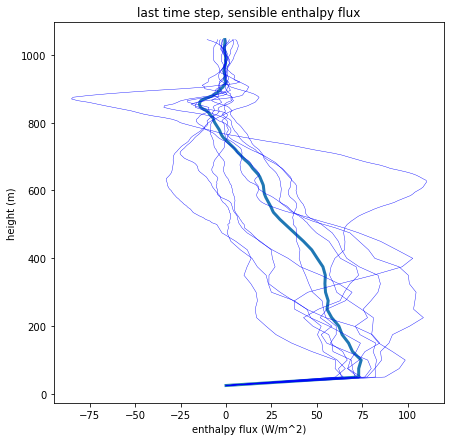

In [15]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
horiz_avg=reynolds_ens_watts.mean(axis=(1,2))
avg_flux=ax.plot(horiz_avg,height,lw=3)
ax.set(xlabel="enthalpy flux (W/m^2)")
ax.set(ylabel="height (m)")
ax.set(title="last time step, sensible enthalpy flux")

nens,nz,ny,nx = Tperturb.shape
for i in range(nens):
    the_temp=Tperturb[i,...]
    the_wvel=Wperturb[i,...]
    horiz_avg_flux = do_horiz_reynolds(the_temp,the_wvel)*rho*cp
    ax.plot(horiz_avg_flux,height,'b-',lw=0.4)
    
